# 18기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Tobigs/week4/Tobigs18기_Week4_KNN&Clustering/과제/Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


나이, 수입, 지출 점수(?) 다보니 범위도 다르고, 단위도 다르다. 표준화 또는 정규화를 해주어야 할것 같다.

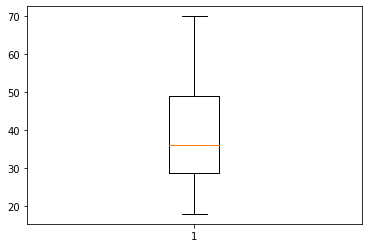

In [ ]:
#상자그림 그려보기
plt.boxplot(df['Age'])
plt.show()

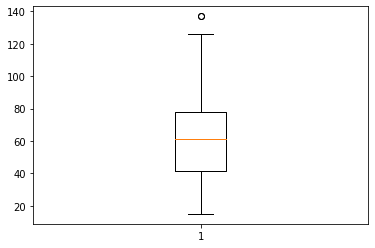

In [ ]:
plt.boxplot(df['Annual Income (k$)'])
plt.show()

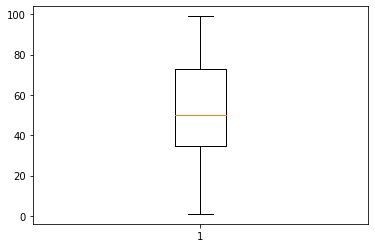

In [ ]:
plt.boxplot(df['Spending Score (1-100)'])
plt.show()

이렇게 깔끔한 상자그림은 살면서 첨본다...<br>
연봉 변수에서 이상치가 하나 있는데, discribe에서 봤던 137인것 같다.<br>
clustering에서 쟤를 잘 감별하면 좋을텐데...일단 냅두고 저 친구를 어떻게 판별하나 보는게 좋을것 같다.

In [ ]:
gender=df['Gender']
df=df.drop('Gender',axis=1)

In [ ]:
feature_names=['Age','Annual Income (k$)','Spending Score (1-100)']

In [ ]:
#표준화 해주기
import sklearn
from sklearn.preprocessing import *

scaler = StandardScaler()
scaler.fit(df)

df_scaled = scaler.transform(df) 

df = pd.DataFrame(df_scaled, columns=feature_names) 
print(df)

          Age  Annual Income (k$)  Spending Score (1-100)
0   -1.424569           -1.738999               -0.434801
1   -1.281035           -1.738999                1.195704
2   -1.352802           -1.700830               -1.715913
3   -1.137502           -1.700830                1.040418
4   -0.563369           -1.662660               -0.395980
..        ...                 ...                     ...
195 -0.276302            2.268791                1.118061
196  0.441365            2.497807               -0.861839
197 -0.491602            2.497807                0.923953
198 -0.491602            2.917671               -1.250054
199 -0.635135            2.917671                1.273347

[200 rows x 3 columns]


In [ ]:
label={'Male':0,'Female':1}
gender=gender.map(label)

In [ ]:
gender=pd.DataFrame(gender)
gender=gender.reset_index()

In [ ]:
df=pd.concat([pd.DataFrame(gender),df],axis=1)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,-1.424569,-1.738999,-0.434801
1,2,0,-1.281035,-1.738999,1.195704
2,3,1,-1.352802,-1.700830,-1.715913
3,4,1,-1.137502,-1.700830,1.040418
4,5,1,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,196,1,-0.276302,2.268791,1.118061
196,197,1,0.441365,2.497807,-0.861839
197,198,0,-0.491602,2.497807,0.923953
198,199,0,-0.491602,2.917671,-1.250054


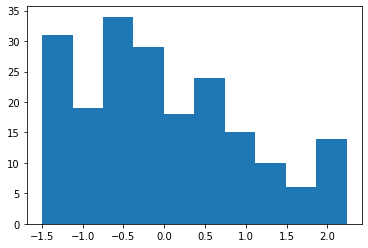

In [ ]:
#히스토그램 그려보기
plt.hist(df['Age'])
plt.show()

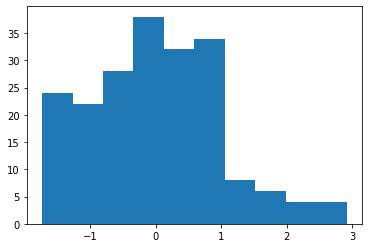

In [ ]:
plt.hist(df['Annual Income (k$)'])
plt.show()

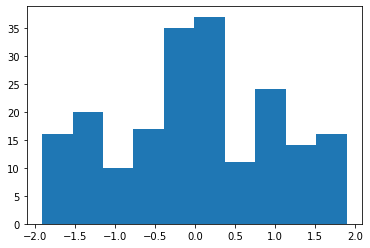

In [ ]:
plt.hist(df['Spending Score (1-100)'])
plt.show()

표준화 시키기 전보다 연봉 변수가 좀 더 정규화를 띈다.

In [ ]:
#다시 index 원래대로 바꿔주기
df = df.set_index("CustomerID")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,-1.424569,-1.738999,-0.434801
2,0,-1.281035,-1.738999,1.195704
3,1,-1.352802,-1.700830,-1.715913
4,1,-1.137502,-1.700830,1.040418
5,1,-0.563369,-1.662660,-0.395980


## 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.

### 1.Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform # pdist() : 축약된 거리행렬

# linkage : pdist함수에서 축약된 거리행렬을 입력 속성으로 사용
row_clusters = linkage(pdist(df, metric = 'euclidean'),
                       method = 'complete')

# linkage함수에서 초기 데이터 배열을 전달하고, euclidean 지표를 매개변수로 사용
row_clusters = linkage(df.values, metric = 'euclidean', method = 'complete')

# 군집 결과를 데이터프레임 형태로 반환
pd.DataFrame(row_clusters,index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,0,1,2,3
cluster 1,65.0,68.0,0.071767,2.0
cluster 2,129.0,131.0,0.071767,2.0
cluster 3,3.0,5.0,0.090080,2.0
cluster 4,114.0,115.0,0.105730,2.0
cluster 5,60.0,70.0,0.120910,2.0
...,...,...,...,...
cluster 195,387.0,388.0,3.289999,64.0
cluster 196,389.0,392.0,4.418632,67.0
cluster 197,393.0,394.0,4.437753,112.0
cluster 198,382.0,396.0,4.808510,133.0


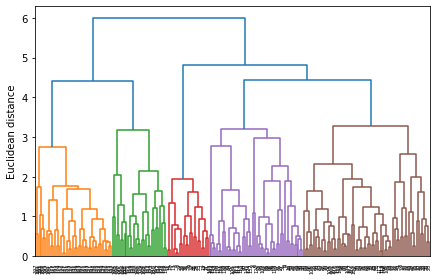

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

row_dendr = sch.dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

참고 사이트: https://hyunse0.tistory.com/50

### K-Means Clustering

In [ ]:
#얼마로 나눌지 보기 위해 산점도를 그려봅시다.
age=df['Age']
income=df['Annual Income (k$)']
SpendingScore=df['Spending Score (1-100)']

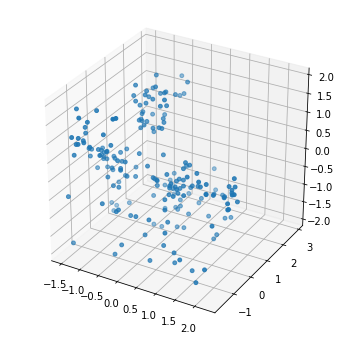

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age, income, SpendingScore, marker='o', s=15, cmap='Greens')

애매하긴 한데....한 3개/4개 정도로 나누면 될것 같습니다,!<br>
참고 사이트: https://wikidocs.net/92111

In [ ]:
df=df.drop('Gender',axis=1)

In [ ]:
#3개로 나눈 버전
from sklearn.cluster import KMeans
Kmean3 = KMeans(n_clusters=3)
Kmean3.fit(df)
Kmean3.cluster_centers_

array([[ 0.8916814 ,  0.04741398, -0.62080368],
       [-0.43033758,  1.02223317,  1.15593564],
       [-0.93381128, -0.67979753,  0.1338202 ]])

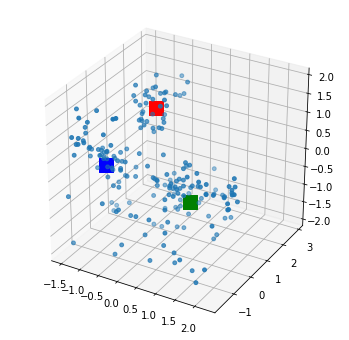

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age, income, SpendingScore, marker='o', s=15, cmap='Greens')
ax.scatter(0.8916814 ,  0.04741398, -0.62080368, s=200, c='g', marker='s')
ax.scatter(-0.43033758,  1.02223317,  1.15593564, s=200, c='r', marker='s')
ax.scatter(-0.93381128, -0.67979753,  0.1338202, s=200, c='b', marker='s')
plt.show()

In [ ]:
#4개로 나눈 버전
Kmean4 = KMeans(n_clusters=4)
Kmean4.fit(df)
Kmean4.cluster_centers_

array([[-0.96249203, -0.78476346,  0.39202966],
       [ 1.08616125, -0.49056525, -0.39717443],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 0.03720536,  0.99011499, -1.18875705]])

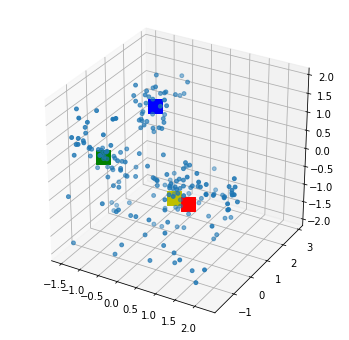

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age, income, SpendingScore, marker='o', s=15, cmap='Greens')
ax.scatter(-0.96249203, -0.78476346,  0.39202966, s=200, c='g', marker='s')
ax.scatter(1.08616125, -0.49056525, -0.39717443, s=200, c='r', marker='s')
ax.scatter(-0.42880597,  0.97484722,  1.21608539, s=200, c='b', marker='s')
ax.scatter(0.03720536,  0.99011499, -1.18875705, s=200, c='y', marker='s')
plt.show()

4개인 경우는생각한대로 산점도가 안그려졌다...<br>
kmeans 참고 사이트:  https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-7-K-%ED%8F%89%EA%B7%A0-%EA%B5%B0%EC%A7%91%ED%99%94-K-means-Clustering

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# create model and prediction
model = DBSCAN(eps=0.5,min_samples=3)
predict = pd.DataFrame(model.fit_predict(df))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([df,predict],axis=1)

print(r)

          Age  Annual Income (k$)  Spending Score (1-100)  predict
0         NaN                 NaN                     NaN     -1.0
1   -1.424569           -1.738999               -0.434801      0.0
2   -1.281035           -1.738999                1.195704     -1.0
3   -1.352802           -1.700830               -1.715913      0.0
4   -1.137502           -1.700830                1.040418      1.0
..        ...                 ...                     ...      ...
196 -0.276302            2.268791                1.118061     -1.0
197  0.441365            2.497807               -0.861839     -1.0
198 -0.491602            2.497807                0.923953     -1.0
199 -0.491602            2.917671               -1.250054     -1.0
200 -0.635135            2.917671                1.273347      NaN

[201 rows x 4 columns]


In [ ]:
r['predict'].unique() #nan 값은 뭘까???

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., nan])

참고한 사이트: https://todayisbetterthanyesterday.tistory.com/62 <br>
개인적으로 참고해보면 좋을것 같은 사이트: https://jimmy-ai.tistory.com/138

## 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

실루엣 계수 구하기

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


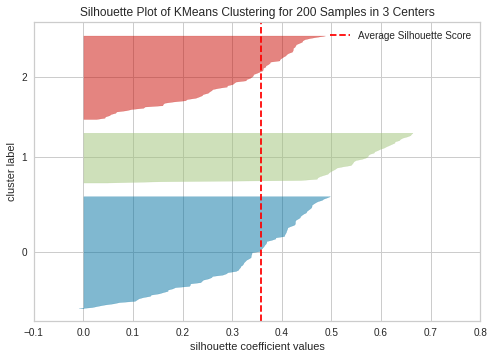

In [ ]:
visualizer_Kmean3 = SilhouetteVisualizer(Kmean3, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_Kmean3.fit(df)      
visualizer_Kmean3.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


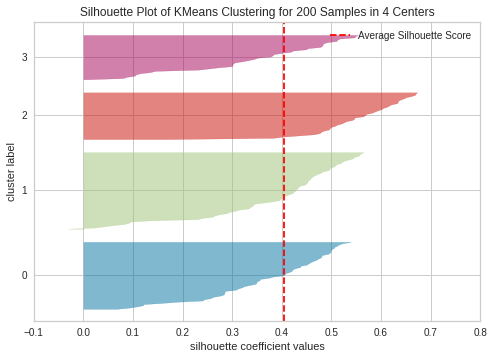

In [ ]:
visualizer_Kmean4 = SilhouetteVisualizer(Kmean4, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_Kmean4.fit(df)      
visualizer_Kmean4.show()

In [ ]:
visualizer_DBSCAN = SilhouetteVisualizer(model, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_DBSCAN.fit_predict(df)      
visualizer_DBSCAN.show()

/usr/local/lib/python3.7/dist-packages/yellowbrick/base.py:237: YellowbrickWarning: SilhouetteVisualizer does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warn_message.format(self.__class__.__name__), YellowbrickWarning


AttributeError: ignored